In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
df = pd.read_csv(r"C:/Users/HP/Downloads/Alexa-Dataset - Alexa-Dataset.csv")

In [89]:
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3070 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [91]:
df.isnull().sum()

rating               0
date                 0
variation            0
verified_reviews    80
feedback             0
dtype: int64

In [92]:
df = df.dropna()

In [93]:
df.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [94]:
df.shape

(3070, 5)

In [95]:
# Converting review text in lowercase
df['clean_text'] = df['verified_reviews'].apply(lambda x: x.lower())

In [96]:
df.sample(5)

,rating,date,variation,verified_reviews,feedback,clean_text
1751,5,31-Jul-18,Black Plus,Plug n Play set up is simple. Added battery ba...,1,plug n play set up is simple. added battery ba...
3095,5,30-Jul-18,Black Dot,"Does what I expected, and more.",1,"does what i expected, and more."
2784,5,30-Jul-18,White Dot,I loved it does exactly what it says,1,i loved it does exactly what it says
2228,5,30-Jul-18,Configuration: Fire TV Stick,"I'm amazed at how many movies, tv shows and mo...",1,"i'm amazed at how many movies, tv shows and mo..."
2651,4,30-Jul-18,Black Dot,It isn’t bad for what it is. Have issues with ...,1,it isn’t bad for what it is. have issues with ...


In [97]:
# Removing all punctuations from review text
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [98]:
df['clean_text'] = df['clean_text'].apply(lambda x: "".join([i for i in x if i not in string.punctuation]))

In [99]:
df.sample(5)

,rating,date,variation,verified_reviews,feedback,clean_text
1347,4,19-Jul-18,White Spot,Bought this to replace a Sony Dash (remember t...,1,bought this to replace a sony dash remember th...
2094,5,30-Jun-18,Black Plus,We love this.,1,we love this
968,5,29-Jul-18,Heather Gray Fabric,Love it!,1,love it
2560,5,30-Jul-18,White Dot,Love the echo dot it’s amaxing!!!,1,love the echo dot it’s amaxing
795,5,30-Jul-18,Walnut Finish,Great fun getting to know all the functions of...,1,great fun getting to know all the functions of...


In [100]:
# Removing Emoji Icons
import re
def remove_emoji(string):
    emoji_pattern = re.compile("["
                              u"\U0001F600-\U0001F64F"  #emoticons
                              u"\U0001F300-\U0001F5FF"
                              u"\U0001F680-\U0001F6FF" 
                              u"\U0001F1E0-\U0001F1FF"
                              u"\U00002702-\U000027B0" 
                              u"\U000024C2-\U0001F251" 
                              "]+",flags = re.UNICODE)
    return emoji_pattern.sub(r'',string)
                              

In [101]:
df['clean_text'] = df['clean_text'].apply(lambda x:remove_emoji(x))
df['clean_text'][2012]

'i was suppose to get the “free” lightbulb with purchase it did not come with echo upon reading more carefully it says to click a box to receive free bulb  of course i want the free bulb who wouldn’t just a sneaky way for them to get out of having to give so many “ free”  bulbs away disappointed  i have yet to set up my echo our first purchase on any alexia device debating if we want to keep it it did come quickly with my prime membership'

In [130]:
# Tokenization
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [131]:
df['tokenized'] = df['clean_text'].apply(lambda x:word_tokenize(x))

In [132]:
df['tokenized']

0                                        [love, my, echo]
1                                             [loved, it]
2       [sometimes, while, playing, a, game, you, can,...
3       [i, have, had, a, lot, of, fun, with, this, th...
4                                                 [music]
                              ...                        
3145    [perfect, for, kids, adults, and, everyone, in...
3146    [listening, to, music, searching, locations, c...
3147    [i, do, love, these, things, i, have, them, ru...
3148    [only, complaint, i, have, is, that, the, soun...
3149                                               [good]
Name: tokenized, Length: 3070, dtype: object

In [133]:
# Removing Stopwords from tokenized text
from nltk.corpus import stopwords
#nltk.download('stopwords')

In [134]:
sw = set(stopwords.words('english'))

In [135]:
df['tokenized'] = df['tokenized'].apply(lambda x: " ".join([i for i in x if i not in sw]))

In [136]:
df['tokenized'] = df['tokenized'].apply(lambda x: x.split())

In [137]:
df['tokenized']

0                                            [love, echo]
1                                                 [loved]
2       [sometimes, playing, game, answer, question, c...
3       [lot, fun, thing, 4, yr, old, learns, dinosaur...
4                                                 [music]
                              ...                        
3145                    [perfect, kids, adults, everyone]
3146    [listening, music, searching, locations, check...
3147    [love, things, running, entire, home, tv, ligh...
3148    [complaint, sound, quality, isnt, great, mostl...
3149                                               [good]
Name: tokenized, Length: 3070, dtype: object

In [138]:
# Stemming
from nltk.stem import SnowballStemmer


In [139]:
ps = SnowballStemmer(language = 'english')

In [140]:
df.head()

,rating,date,variation,verified_reviews,feedback,clean_text,tokenized
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,love my echo,"[love, echo]"
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,loved it,[loved]
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,sometimes while playing a game you can answer ...,"[sometimes, playing, game, answer, question, c..."
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,i have had a lot of fun with this thing my 4 y...,"[lot, fun, thing, 4, yr, old, learns, dinosaur..."
4,5,31-Jul-18,Charcoal Fabric,Music,1,music,[music]


In [143]:
df['stemmed_text'] = df['tokenized'].apply(lambda x: " ".join([ps.stem(word) for word in x]))

In [144]:
df['stemmed_text']

0                                               love echo
1                                                    love
2       sometim play game answer question correct alex...
3       lot fun thing 4 yr old learn dinosaur control ...
4                                                   music
                              ...                        
3145                            perfect kid adult everyon
3146    listen music search locat check time look weat...
3147    love thing run entir home tv light thermostat ...
3148    complaint sound qualiti isnt great most use co...
3149                                                 good
Name: stemmed_text, Length: 3070, dtype: object

In [145]:
# Bag of Words
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english')

In [146]:
vectorizer.fit(df['stemmed_text'])

CountVectorizer(stop_words='english')

In [147]:
len(vectorizer.get_feature_names_out())

3142

In [148]:
x = vectorizer.transform(df['stemmed_text'])
df_bow = pd.DataFrame(x.toarray(),columns = vectorizer.get_feature_names_out())

In [149]:
df_bow

,072318,10,100,1000,100x,1010,1030pm,11,1100sf,1220,...,yr,yrs,yup,zero,zigbe,zonkedout,zwave,zzzz,zzzzzzz,útil
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3065,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3066,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3067,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3068,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [150]:
# TF_IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()

df_tfidf = tfidf.fit_transform(df['stemmed_text'])

In [151]:
df_tfidf = df_tfidf.toarray()

In [152]:
df_tfidf = pd.DataFrame(df_tfidf,columns = tfidf.get_feature_names_out())

In [153]:
df_tfidf.head(5)

,072318,10,100,1000,100x,1010,1030pm,11,1100sf,1220,...,yr,yrs,yup,zero,zigbe,zonkedout,zwave,zzzz,zzzzzzz,útil
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.35255,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [154]:
# Plot graph for positive and negative feedback
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment import SentimentIntensityAnalyzer

si = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...


In [155]:
df['sentiment_score'] = df['clean_text'].apply(lambda x: si.polarity_scores(x)['compound'])

In [156]:
def sentiment_func(n):
    if (n>0):
        return 'positive'
    elif (n<0):
        return 'negative'
    else:
        return 'neutral'

df['sentiment'] = df['sentiment_score'].apply(lambda x:sentiment_func(x))

In [157]:
df.head()

,rating,date,variation,verified_reviews,feedback,clean_text,tokenized,stemmed_text,sentiment_score,sentiment
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,love my echo,"[love, echo]",love echo,0.6369,positive
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,loved it,[loved],love,0.5994,positive
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,sometimes while playing a game you can answer ...,"[sometimes, playing, game, answer, question, c...",sometim play game answer question correct alex...,-0.1280,negative
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,i have had a lot of fun with this thing my 4 y...,"[lot, fun, thing, 4, yr, old, learns, dinosaur...",lot fun thing 4 yr old learn dinosaur control ...,0.9169,positive
4,5,31-Jul-18,Charcoal Fabric,Music,1,music,[music],music,0.0000,neutral


<Axes: xlabel='sentiment', ylabel='count'>

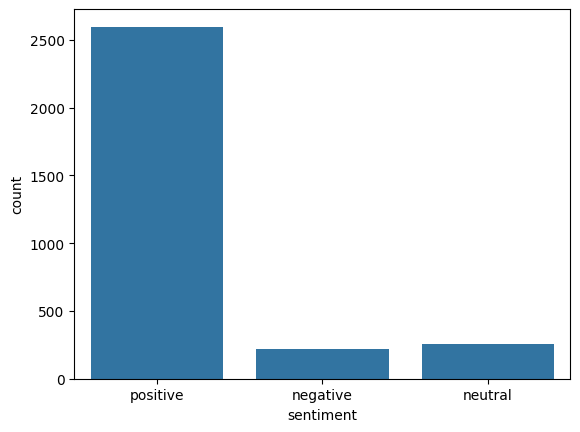

In [158]:
sns.countplot(data=df,x = 'sentiment')

<function matplotlib.pyplot.show(close=None, block=None)>

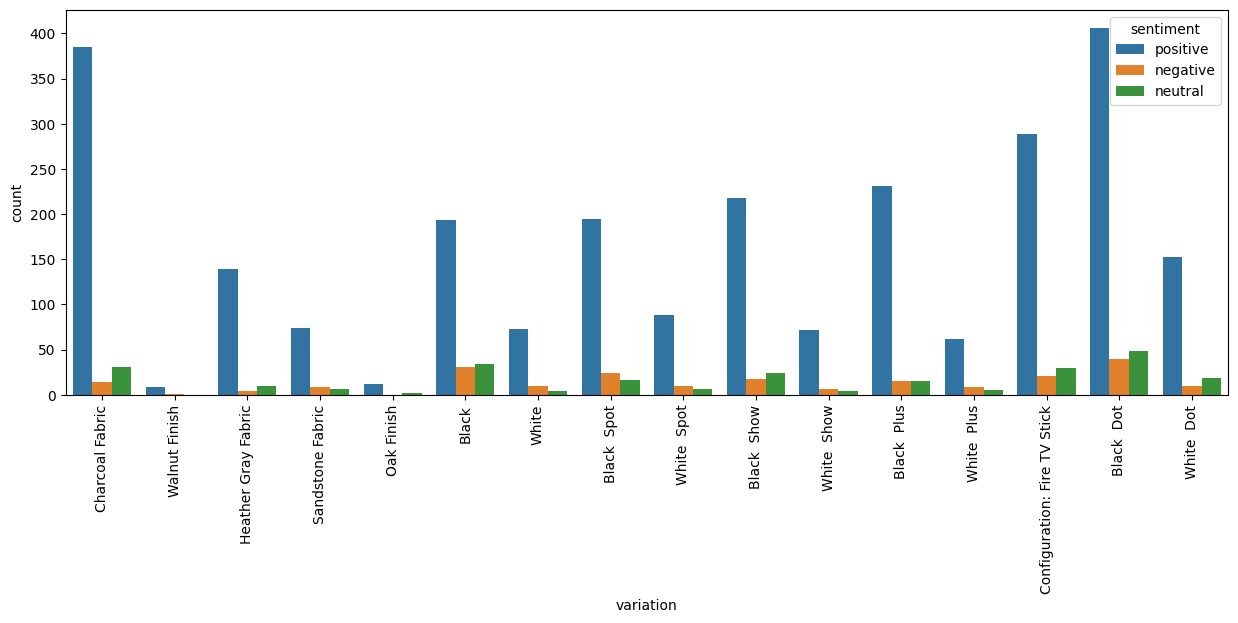

In [159]:
plt.figure(figsize = (15,5))
sns.countplot(data=df,x = 'variation',hue = 'sentiment')
plt.xticks(rotation=90)
plt.show